128


C:\Users\zzj\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


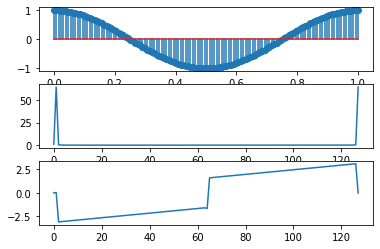

In [51]:
import numpy as np
import matplotlib.pyplot as plt

N=128
n=np.linspace(0,1,N)
f=1
x = np.cos(2*np.pi*n*f)   #(a)the sampling rate is above the Nyquist rate of 2f

print(len(x))


def DFT(x,N):   #(b) N-pont DFT by generate a N*N matrix then N*x=x_K
  
    n = np.arange(N)
    n = np.expand_dims(n, axis=1)      
    k = n
    m = n.T * k / N                    # [N,1] * [1, N] = [N,N]
    S_ = np.exp(1j * 2 * np.pi * m)     #  S
    S = np.conjugate(S_)

    X_k = np.dot(S, x)
    return X_k

X_k = DFT(x,N)
mX = np.abs(X_k)
pX = np.angle(X_k)

# plot the magnitude and phase

plt.subplot(3,1,1)
plt.stem(n,x)

plt.subplot(3,1,2)
plt.plot(mX)

plt.subplot(3,1,3)
plt.plot(pX)
plt.show()



C:\Users\zzj\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
C:\Users\zzj\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


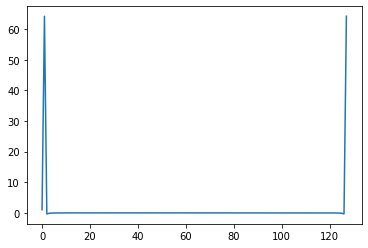

In [84]:
def myFFT(inList, N): # N even 
    X = np.zeros((N, ))
    if N < 2:
        return inList
    else:
        xx1, xx2 = inList[::2], inList[1::2]   # xx1 even, xx2 odd
        X1 = myFFT(xx1, int(N/2))
        X2 = myFFT(xx2, int(N/2))
        for k in range(int(N/2)):
            X[k] = X1[k] + np.exp(np.complex(
                0, -2 * np.pi * k / N
            )) * X2[k]
            X[k + int(N/2)] = X1[k] - np.exp(np.complex(
                0, -2 * np.pi * k / N
            )) * X2[k]
    return X


n=np.linspace(0,1,128)
N= 128
f=1
x = np.cos(2*np.pi*n*f)
plt.plot(x, label = 'input')
result = myFFT(x,N)
plt.plot(abs(result), label = 'output')
plt.legend(loc='best')
plt.show()




C:\Users\zzj\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':
C:\Users\zzj\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
C:\Users\zzj\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\zzj\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\zzj\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Pyth

MyFFT time is ： 0.7429486000037286
DFT time is ： 6.255682499999239


C:\Users\zzj\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


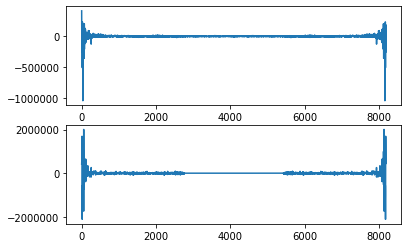

In [99]:
import time
from scipy.io import wavfile
sample_rate,sig_clip=wavfile.read(r'F:\lecture document\ECE 4250 signal\clip.wav')
sig_clip=np.array(sig_clip,dtype=np.float32)
sig_clip=sig_clip[:,0]

sig=sig_clip[0:8192]

start = time.clock()
result1 = myFFT(sig,8192)
end = time.clock()
t=end-start
print("MyFFT time is ：",t)

start = time.clock()
result2 = DFT(sig,8192)
end = time.clock()
t=end-start
print("DFT time is ：",t)

plt.subplot(2,1,1)
plt.plot(result1)

plt.subplot(2,1,2)
plt.plot(result2)

